In [7]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
crossover_data_path = "/home/trevor/boolean_network_data/and_evolution_results/crossover_2023-03-01-10-12-47/checkpoint_data"
random_data_path = "/home/trevor/boolean_network_data/and_evolution_results/rwalk_2023-03-01-13-42-13/checkpoint_data"
swap_data_path = "/home/trevor/boolean_network_data/and_evolution_results/swap_2023-03-01-10-42-01/checkpoint_data"


In [14]:
def load_loss(path):
    timestamps = []
    losses = []
    for file in glob.glob(os.path.join(path, "*.npz")):
        data = np.load(file)
        timestamps.append(data["timestamp"])
        losses.append(data["errors"])
    timestamps, losses = zip(*sorted(zip(timestamps, losses)))
    return timestamps, losses


cross_timestamps, cross_losses = load_loss(crossover_data_path)
rwalk_timestamps, rwalk_losses = load_loss(random_data_path)
swap_timestamps, swap_losses = load_loss(swap_data_path)

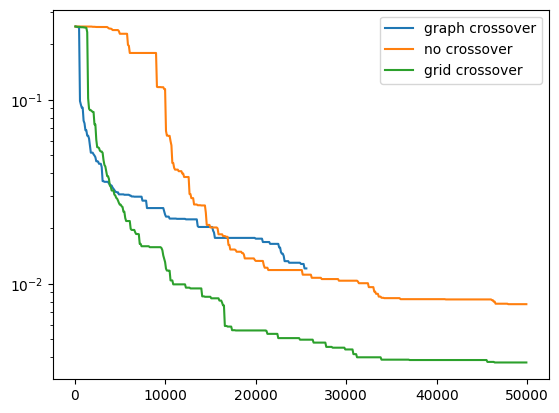

In [16]:
fig, axs = plt.subplots()
axs.plot(cross_timestamps, [np.median(x) for x in cross_losses], label="graph crossover")
axs.plot(rwalk_timestamps, [np.median(x) for x in rwalk_losses], label="no crossover")
axs.plot(swap_timestamps, [np.median(x) for x in swap_losses], label="grid crossover")
axs.set_yscale("log")
axs.legend()


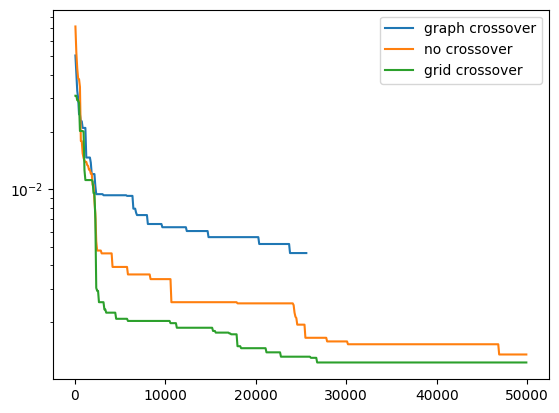

In [17]:
fig, axs = plt.subplots()
axs.plot(cross_timestamps, [np.min(x) for x in cross_losses], label="graph crossover")
axs.plot(rwalk_timestamps, [np.min(x) for x in rwalk_losses], label="no crossover")
axs.plot(swap_timestamps, [np.min(x) for x in swap_losses], label="grid crossover")
axs.set_yscale("log")
axs.legend()
